<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/Book/Section%202.2.3%20Daily%20Returns%20of%20the%20S%26P%20500%20Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Installing yfinance and getting the data...")
!pip install yfinance 1>/dev/null
from yfinance import download
import pandas as pd
import numpy as np ;
import matplotlib.pyplot as pl
from statsmodels.base.model import GenericLikelihoodModel
from datetime import datetime
zero,one,two,five,hundred=0e0,1e0,2e0,5e0,1e2 # some friendly numbers
half,GoldenRatio=one/two,(one+np.sqrt(five))/two

# get the daily returns of the S&P 500 
SPX=download('^GSPC','1957-03-01').dropna()
SPX['Return']=SPX['Adj Close'].pct_change()*hundred
SPX.index=pd.DatetimeIndex(SPX.index).to_period('D')
SPX.dropna(inplace=True)
SPX.loc[SPX["Volume"]==0,"Volume"]=np.nan
SPX

Installing yfinance and getting the data...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,44.060001,1.890000e+06,0.731595
1957-03-05,44.220001,44.220001,44.220001,44.220001,44.220001,1.860000e+06,0.363141
1957-03-06,44.230000,44.230000,44.230000,44.230000,44.230000,1.840000e+06,0.022610
1957-03-07,44.209999,44.209999,44.209999,44.209999,44.209999,1.830000e+06,-0.045219
1957-03-08,44.070000,44.070000,44.070000,44.070000,44.070000,1.630000e+06,-0.316669
...,...,...,...,...,...,...,...
2022-03-22,4469.100098,4522.000000,4469.100098,4511.609863,4511.609863,3.962880e+09,1.130411
2022-03-23,4493.100098,4501.069824,4455.810059,4456.240234,4456.240234,4.014360e+09,-1.227270
2022-03-24,4469.979980,4520.580078,4465.169922,4520.160156,4520.160156,3.573430e+09,1.434391


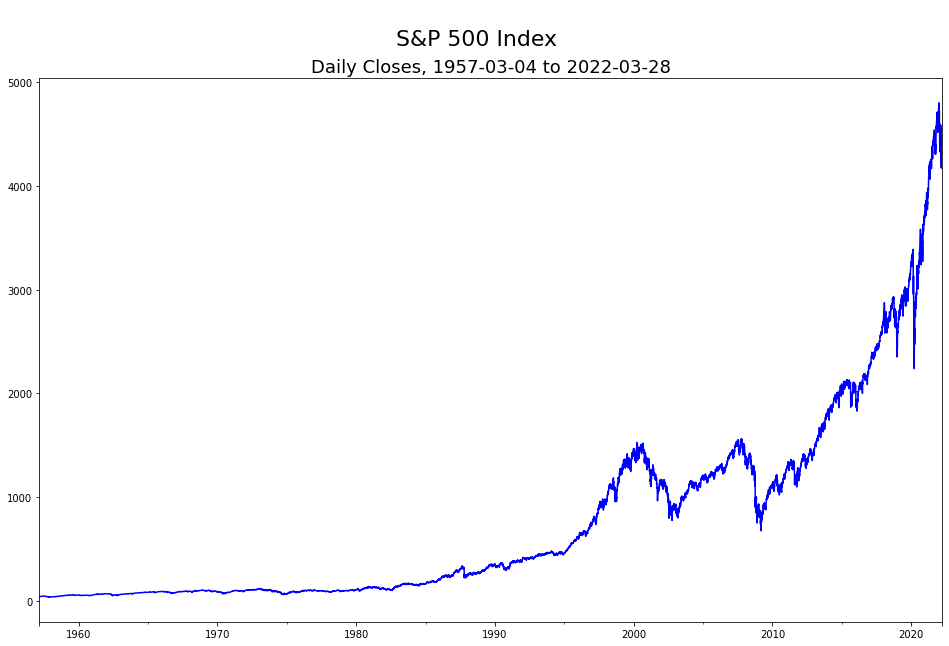

In [3]:
# Figure 2.1
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
SPX['Adj Close'].plot(ax=plot,color='blue')
figure.suptitle('\nS&P 500 Index',fontsize=22)
plot.set_title('Daily Closes, %s to %s' % (SPX.index[0],SPX.index[-1]),fontsize=18)
plot.set_ylabel(None)
plot.set_xlabel(None);

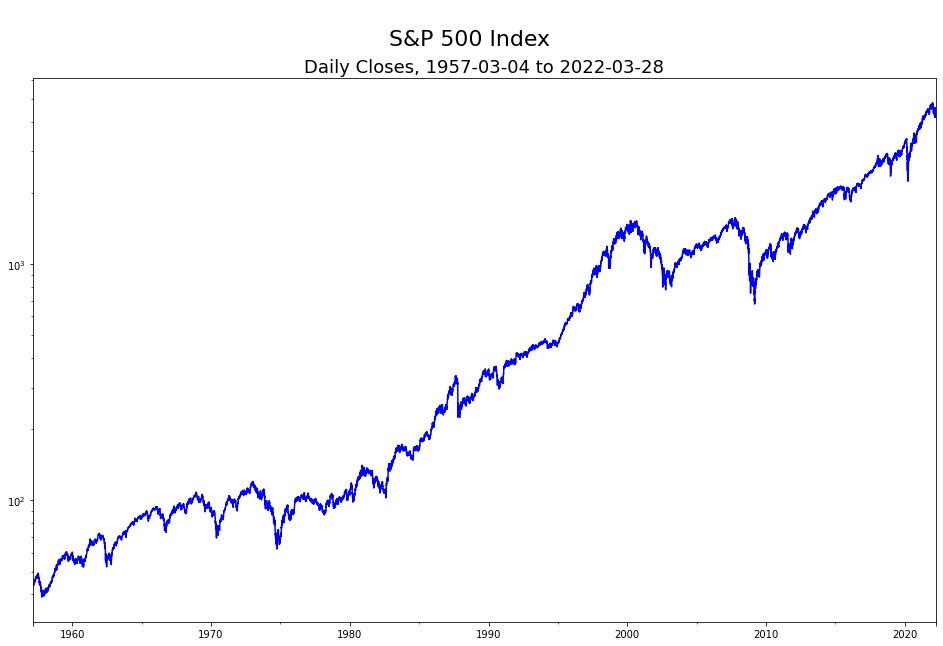

In [4]:
# Figure 2.2
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
SPX['Adj Close'].plot(ax=plot,color='blue')
figure.suptitle('\nS&P 500 Index',fontsize=22)
plot.set_title('Daily Closes, %s to %s' % (SPX.index[0],SPX.index[-1]),fontsize=18)
plot.set_yscale('log')
plot.set_ylabel(None)
plot.set_xlabel(None);

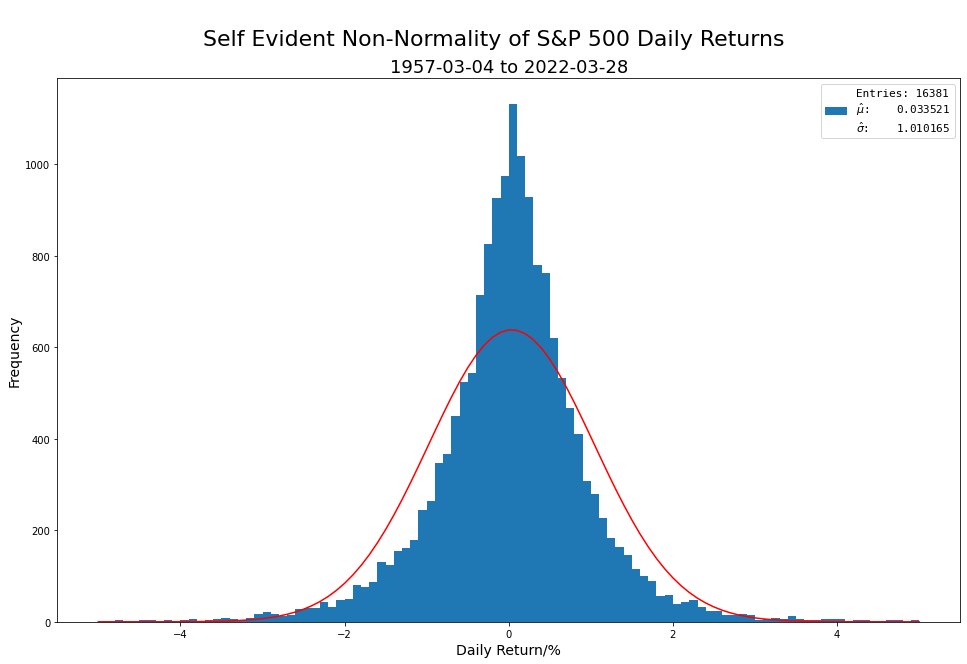

In [5]:
# Figure 2.3
from scipy.stats import norm
estimates=norm.fit(SPX['Return'])
model=norm(*estimates)
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
samples,bins,patches=plot.hist(SPX['Return'],bins=np.linspace(-5,5,101),label="""Entries: %d
$\\hat{\\mu}$:%12.6f
$\\hat{\\sigma}$:%12.6f""" % (SPX["Return"].count(),estimates[-2],estimates[-1]))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r')
plot.set_xlabel("Daily Return/%",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nSelf Evident Non-Normality of S&P 500 Daily Returns",fontsize=22)
plot.set_title("%s to %s" % (SPX.index[0],SPX.index[-1]),fontsize=18)
pl.setp(plot.legend(loc='upper right',fontsize=11).texts,family='monospace');

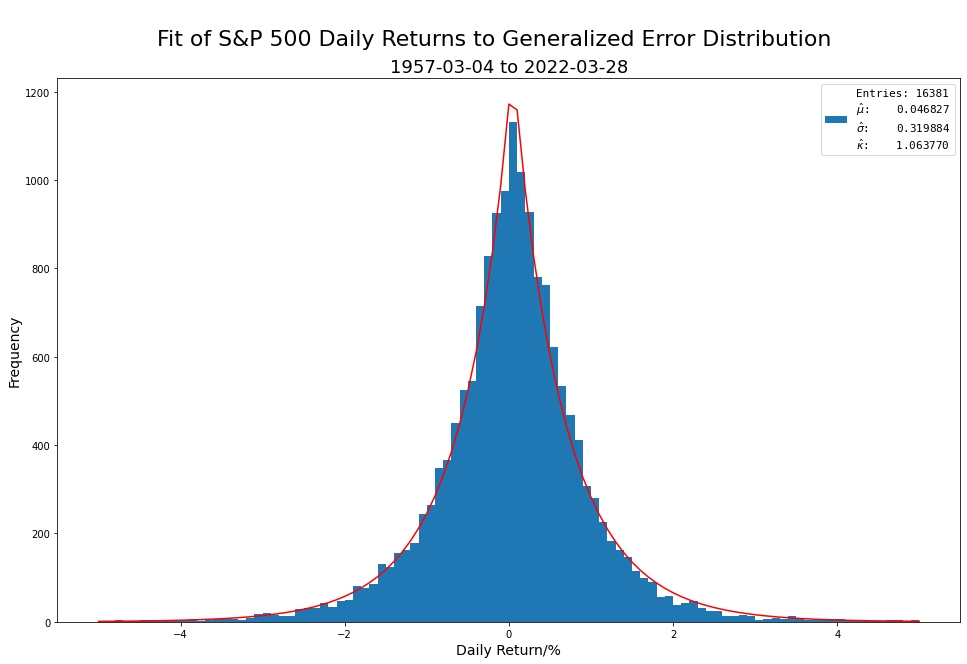

In [6]:
# Figure 2.4
from scipy.stats import gennorm # gennorm is parameterized in such a manner that kappa=1/beta and sigma=scale/(2^kappa)
estimates=gennorm.fit(SPX['Return'])
model=gennorm(*estimates)
figure,plot=pl.subplots(figsize=(10*GoldenRatio,10))
samples,bins,patches=plot.hist(SPX['Return'],bins=np.linspace(-5,5,101),label="""Entries: %d
$\\hat{\\mu}$:%12.6f
$\\hat{\\sigma}$:%12.6f
$\\hat{\\kappa}$:%12.6f""" % (SPX["Return"].count(),estimates[-2],estimates[-1]/np.power(two,estimates[0]),one/estimates[0]))
plot.plot(bins,model.pdf(bins)*sum(samples)*(bins[-1]-bins[0])/len(bins),'-r')
plot.set_xlabel("Daily Return/%",fontsize=14)
plot.set_ylabel("Frequency",fontsize=14)
figure.suptitle("\nFit of S&P 500 Daily Returns to Generalized Error Distribution",fontsize=22)
plot.set_title("%s to %s" % (SPX.index[0],SPX.index[-1]),fontsize=18)
pl.setp(plot.legend(loc='upper right',fontsize=11).texts,family='monospace');